# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&q="
units = "&units=imperial"

print("Beginning Data Retrieval")
print("------------------------------")

city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
weather_date = []

for city in cities:
    try:
        response = requests.get(url + city + units).json()
        city_name.append(response['name'])
        city_id = response['id']
        city = response['name']
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        weather_date.append(response['dt'])
        print(f"Processing Record {city_id} | {city}")
    
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
------------------------------
Processing Record 3576994 | Cockburn Town
Processing Record 1214488 | Meulaboh
Processing Record 1015776 | Bredasdorp
Processing Record 6201424 | Mataura
Processing Record 5338122 | Clovis
Processing Record 3395981 | Maceió
Processing Record 5848280 | Kapaa
Processing Record 3833367 | Ushuaia
City not found. Skipping...
Processing Record 2630299 | Hofn
Processing Record 5866583 | Saint Paul Harbor
Processing Record 546105 | Nikolskoye
Processing Record 3424607 | Tasiilaq
Processing Record 430569 | Ngozi
Processing Record 4033557 | Tautira
Processing Record 2522437 | Adeje
Processing Record 1501795 | Krivosheino
Processing Record 3874787 | Punta Arenas
Processing Record 4828890 | Chillicothe
Processing Record 468483 | Yazykovo
Processing Record 2121909 | Poronaysk
Processing Record 2075265 | Busselton
City not found. Skipping...
Processing Record 2270385 | Camacha
Processing Record 5970234 | Hanna
Processing Record 5379533 | Orange

City not found. Skipping...
Processing Record 491281 | Sokol
Processing Record 2140558 | Koumac
Processing Record 3423146 | Ilulissat
Processing Record 1035025 | Nacala
Processing Record 2527087 | Tiznit Province
Processing Record 2065594 | Mount Isa
Processing Record 2127202 | Anadyr
Processing Record 2208248 | Kaitangata
Processing Record 3397763 | Jacareacanga
Processing Record 2126199 | Cherskiy
Processing Record 3839307 | Rawson
Processing Record 5282297 | Bethel
Processing Record 8079926 | Labuhan
Processing Record 2255414 | Pointe-Noire
Processing Record 5478673 | Meadow Lake
City not found. Skipping...
Processing Record 2101169 | Aitape
Processing Record 1819729 | Hong Kong
Processing Record 2514651 | Los Llanos de Aridane
Processing Record 5882953 | Aklavik
Processing Record 6167817 | Torbay
Processing Record 2391377 | Tchaourou
Processing Record 3893726 | Constitución
Processing Record 55671 | Kismayo
Processing Record 2137773 | Vao
Processing Record 1528998 | Yumen
Processin

Processing Record 3537840 | Santa Cruz del Sur
Processing Record 2963155 | Kinsale
Processing Record 3419842 | Sisimiut
Processing Record 2517750 | Felanitx
Processing Record 1337605 | Mahibadhoo
Processing Record 5962442 | Goderich
Processing Record 3573374 | The Valley
Processing Record 1292037 | Thayetmyo
Processing Record 2184512 | Pleasant Point
Processing Record 89113 | Ajdabiya
Processing Record 3832899 | Viedma
Processing Record 4982044 | Waldoboro
Processing Record 3693584 | Pimentel
City not found. Skipping...
Processing Record 2641181 | Norwich
Processing Record 5203127 | New Castle
Processing Record 530966 | Maloarkhangel'sk
Processing Record 330120 | NEDJO
Processing Record 3127047 | Calatayud
Processing Record 3938415 | Ilo
Processing Record 6355222 | Yulara
Processing Record 1259735 | Phulpur
Processing Record 3182636 | Avezzano
City not found. Skipping...
Processing Record 3948613 | Acarí
Processing Record 3471451 | Arraial do Cabo
Processing Record 4021858 | Guerrero N

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data_df = pd.DataFrame({
    "City":city_name,
    "Lat":latitude,
    "Lon":longitude,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":weather_date     
})

weather_data_df.count()

City          556
Lat           556
Lon           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
weather_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.46,-71.14,84.20,70,40,11.41,TC,1594600155
1,Meulaboh,4.14,96.13,76.42,78,100,2.08,ID,1594600155
2,Bredasdorp,-34.53,20.04,62.60,48,0,19.46,ZA,1594600085
3,Mataura,-46.19,168.86,42.94,86,86,3.98,NZ,1594600044
4,Clovis,36.83,-119.70,109.99,12,20,6.93,US,1594599986


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.557374,13.010180,68.521673,72.079137,49.212230,7.636906,1.594600e+09
std,33.426653,90.832474,14.021083,18.978058,38.491252,5.469781,8.828269e+01
min,-54.800000,-179.170000,30.200000,8.000000,0.000000,0.200000,1.594599e+09
25%,-9.702500,-69.365000,57.200000,61.000000,4.000000,3.400000,1.594600e+09
50%,24.420000,15.445000,70.670000,76.000000,48.000000,5.990000,1.594600e+09
75%,47.215000,95.322500,77.942500,87.000000,90.000000,10.290000,1.594600e+09
max,78.220000,179.320000,114.800000,100.000000,100.000000,30.330000,1.594600e+09


In [7]:
# Make a new DataFrame to drop any cities with a humidity greather than 100
lower_humidity_df = weather_data_df.loc[weather_data_df["Humidity"] <= 100, :]

lower_humidity_df.to_csv("output_data/WeatherData.csv", index=False, header=True)

lower_humidity_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.46,-71.14,84.20,70,40,11.41,TC,1594600155
1,Meulaboh,4.14,96.13,76.42,78,100,2.08,ID,1594600155
2,Bredasdorp,-34.53,20.04,62.60,48,0,19.46,ZA,1594600085
3,Mataura,-46.19,168.86,42.94,86,86,3.98,NZ,1594600044
4,Clovis,36.83,-119.70,109.99,12,20,6.93,US,1594599986


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

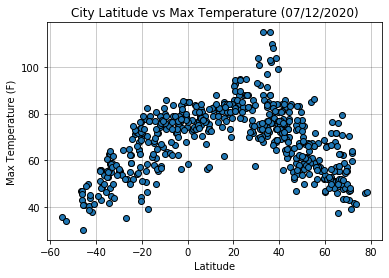

In [8]:
today_date = pd.to_datetime('today').strftime("%m/%d/%Y")

plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Max Temp"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Max Temperature (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("output_data/LatitudeVSMaxTemperature.png")
plt.show()

#### The graph is showing the correlation between latitude and maximum tempature. The closer to the equator (0 Latitude), the hotter the temperatures. 

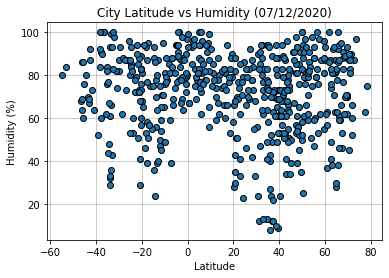

In [9]:
plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Humidity"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Humidity (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/LatitudeVSHumidity.png")
plt.show()

#### The graph is showing the correlation between latitude and humidity. There does not appear to be a correlation between latitude and humidity.

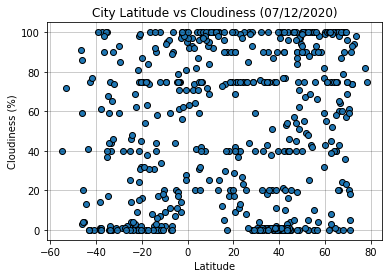

In [10]:
plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Cloudiness"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Cloudiness (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/LatitudeVSCloudiness.png")
plt.show()

#### The graph is showing the correlation between latitude and cloudiness. There does not appear to be a correlation between latitude and cloudiness.

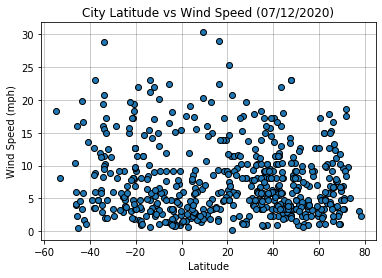

In [11]:
plt.scatter(lower_humidity_df["Lat"],lower_humidity_df["Wind Speed"], edgecolor = 'black')
plt.grid(color="black", linewidth=1,alpha=0.20)
plt.title("City Latitude vs Wind Speed (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/LatitudeVSWindSpeed.png")
plt.show()

#### The graph is showing the correlation between latitude and wind speed. It appears no matter what latitude the wind speeds are lower with a few outliers. 

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def hemp_regression(x_values,y_values,y_axis_name,hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(), y_values.min()),fontsize=15,color="red")
    plt.title(hemisphere + " - " + y_axis_name + " vs. Latitude Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis_name)
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig("output_data/Regression_"+ hemisphere + "_LatitudeVs" + y_axis_name + ".png")
    plt.show()

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = lower_humidity_df.loc[lower_humidity_df["Lat"] >= 0, :]
northern_hemisphere_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cockburn Town,21.46,-71.14,84.20,70,40,11.41,TC,1594600155
1,Meulaboh,4.14,96.13,76.42,78,100,2.08,ID,1594600155
4,Clovis,36.83,-119.70,109.99,12,20,6.93,US,1594599986
6,Kapaa,22.08,-159.32,82.40,69,40,20.80,US,1594599970
8,Hofn,64.25,-15.21,50.95,87,100,8.08,IS,1594600156


In [14]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere_df = lower_humidity_df.loc[lower_humidity_df["Lat"] < 0, :]
southern_hemisphere_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Bredasdorp,-34.53,20.04,62.60,48,0,19.46,ZA,1594600085
3,Mataura,-46.19,168.86,42.94,86,86,3.98,NZ,1594600044
5,Maceió,-9.67,-35.74,73.40,88,75,1.12,BR,1594600052
7,Ushuaia,-54.80,-68.30,35.60,80,40,18.34,AR,1594600046
12,Ngozi,-2.91,29.83,56.16,87,9,2.17,BI,1594600156


The r-squared is: 0.4016597417339524


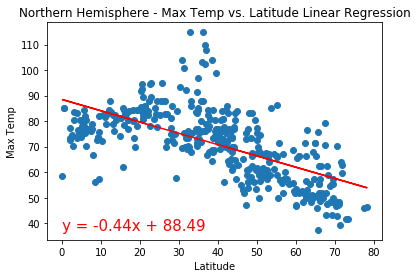

In [15]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Max Temp"],"Max Temp","Northern Hemisphere")

The r-squared is: 0.6086105642148647


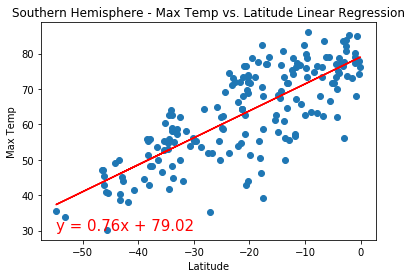

In [16]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Max Temp"],"Max Temp","Southern Hemisphere")

#### In both hemispheres, there appears to be a direct correlation between latitude and temperature. As the latitude increases the temperature decreases and as the latitude decreases the temperature increases.


The r-squared is: 0.0031057001969426847


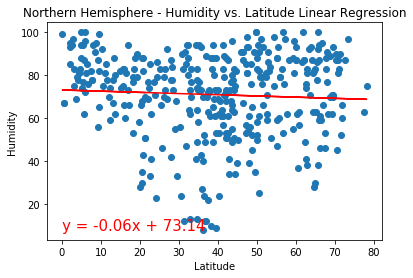

In [17]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Humidity"],"Humidity","Northern Hemisphere")

The r-squared is: 0.0018068907304551473


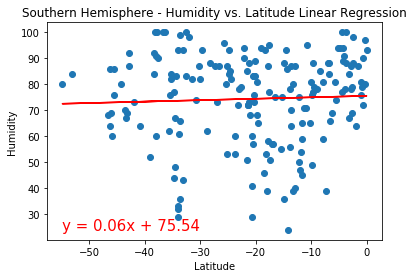

In [18]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Humidity"],"Humidity","Southern Hemisphere")

#### There appears to be no correlation between latitude and humidity. The regression lines are pretty straight showing there is no way of determing humidity based on latitude and vice versa.

The r-squared is: 0.0008553939467249262


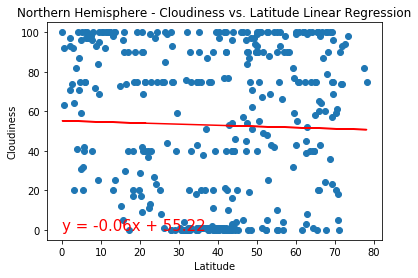

In [19]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Cloudiness"],"Cloudiness","Northern Hemisphere")

The r-squared is: 0.02708126617727342


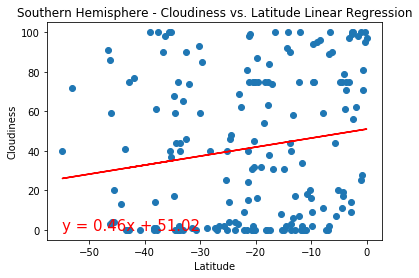

In [20]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Cloudiness"],"Cloudiness","Southern Hemisphere")

#### In the northern hemisphere, the regression line is almost flat which shows there is not much of a correlation between latitude and cloudiness. In the southern hemisphere, the line has a slight upward trend which denotes that as latitude decreases the cloudiness increases. 

The r-squared is: 0.003592476561971103


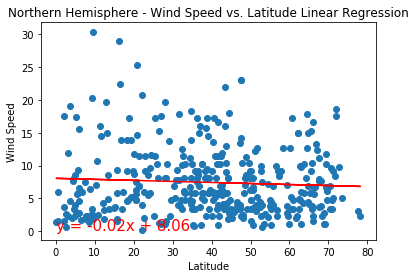

In [21]:
hemp_regression(northern_hemisphere_df["Lat"],northern_hemisphere_df["Wind Speed"],"Wind Speed","Northern Hemisphere")

The r-squared is: 0.024003381041732837


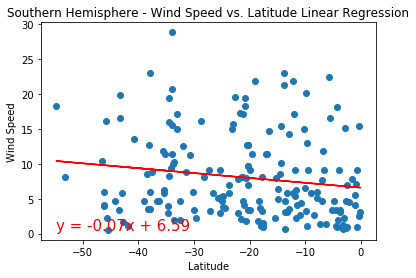

In [22]:
hemp_regression(southern_hemisphere_df["Lat"],southern_hemisphere_df["Wind Speed"],"Wind Speed","Southern Hemisphere")

#### In both hemispheres, the regression lines have a slight downward trend which denotes that as latitude decreases the wind speed decreases as well.